# K-means algorithm

Step-by-step:
1. Randomly guess the centers of the clusters. We call this points the "centroids".
2. Assign the label of each point to the nearest centroid.
3. Calculate the average location of all points in each cluster.
4. Move the centroids to the average location.
5. Repeat steps 2-4 until there is no more change in the centroids positions.

**Imports**

In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

warnings.filterwarnings('ignore')

%matplotlib inline

**Generate**

In [2]:
x, y = make_blobs(
    n_samples=100,
    n_features=2, 
    random_state=13)

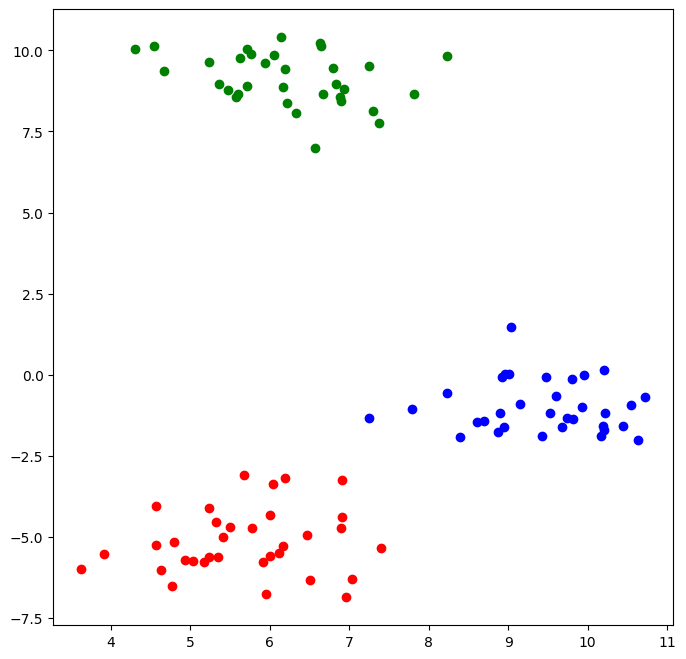

In [3]:
color_map = ['red', 'green', 'blue']

fig, (ax) = plt.subplots(1, 1, figsize=(8, 8))
for i in range(x.shape[0]):
    label = y[i]
    ax.scatter(x[i][0], x[i][1], c=color_map[label])
fig.show()

**Implementation**

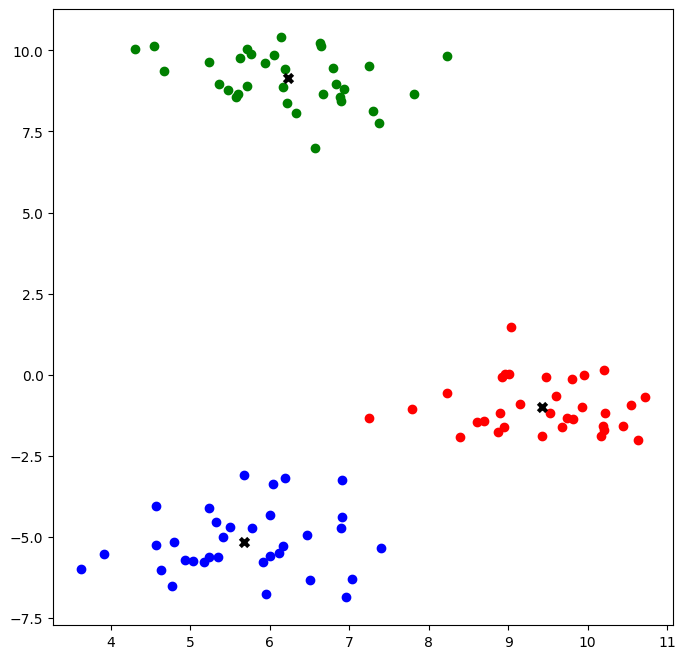

In [4]:
def initialize_centroids(x, num_clusters):
    indices = np.random.choice(x.shape[0], num_clusters, replace=False)
    return x[indices]

def assign_labels(x, centroids):
    distances = np.linalg.norm(x[:, None, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(x, labels, num_clusters):
    centroids = np.array([np.mean(x[labels == i], axis=0) for i in range(num_clusters)])
    return centroids

def k_means(x, num_clusters, color_map):
    # Step 1: Randomly initialize centroids
    centroids = initialize_centroids(x, num_clusters)

    while True:
        # Step 2: Assign labels to points based on the nearest centroid
        labels = assign_labels(x, centroids)
        
        # Step 3: Update centroids
        new_centroids = update_centroids(x, labels, num_clusters)
        
        # Stop if centroids didn't move
        if np.array_equal(centroids, new_centroids):
            break
        
        centroids = new_centroids

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot points
    for i in range(x.shape[0]):
        label = labels[i]
        ax.scatter(x[i][0], x[i][1], c=color_map[label])

    # Plot centroids
    for centroid in centroids:
        ax.scatter(centroid[0], centroid[1], c='black', marker='x', linewidths=3)

    plt.show()

# Example usage with the number of clusters as a parameter
num_clusters = 3
k_means(x, num_clusters, color_map)